### KNN Classifier applied on spectral data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from package_toolbox.subpackage_preprocessingtools.FFT_Tool import Compute_Multiple_FFT_in_Chunks
from package_toolbox.subpackage_preprocessingtools import Processed_Data as proc

Load complete files with frequency spectrum per chunk (seperated DE_time and FE_time)

In [2]:
List_of_matfiles_1750 = proc.get_filelist_from_48k_and_Normal_Data('1750')
X_DE_time_1750, y_DE_time_1750 = Compute_Multiple_FFT_in_Chunks(List_of_matfiles_1750, column='DE_time', rpm='1750')

In [3]:
List_of_matfiles_1750 = proc.get_filelist_from_48k_and_Normal_Data('1750')
X_FE_time_1750, y_FE_time_1750 = Compute_Multiple_FFT_in_Chunks(List_of_matfiles_1750, column='FE_time', rpm='1750')

Model Training, K Neighbors optimization

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_FE_time_1750, y_FE_time_1750, test_size = 0.3, random_state = 42, stratify = y_FE_time_1750)

In [5]:
number_neighbors = []
mean_score = []
std_score = []

for i in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=i)
    stf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)
    scores = cross_val_score(clf, X_train, y_train, cv=stf)
    
    number_neighbors = np.append(number_neighbors, [i], axis = 0)
    mean_score = np.append(mean_score, [scores.mean()], axis = 0)
    std_score = np.append(std_score, [scores.std()], axis = 0)

dataset_accuracies = pd.DataFrame({'K Neighbors': number_neighbors, 'Mean Accurcy': mean_score, 'Standard Deviation Accuracy': std_score})

In [6]:
dataset_accuracies.head(20)

K Neighbors  Mean Accurcy  Standard Deviation Accuracy
0           1.0      0.999034                     0.001183
1           2.0      0.997582                     0.003057
2           3.0      0.998065                     0.002370
3           4.0      0.997098                     0.003554
4           5.0      0.997098                     0.002822
5           6.0      0.996132                     0.002903
6           7.0      0.996615                     0.002469
7           8.0      0.996131                     0.003285
8           9.0      0.996615                     0.002469
9          10.0      0.996615                     0.002469
10         11.0      0.996615                     0.002469
11         12.0      0.996132                     0.002903
12         13.0      0.996615                     0.002469
13         14.0      0.995647                     0.003557
14         15.0      0.995166                     0.003058
15         16.0      0.994681                     0.003556
16         17.0      0.993715                     0.003620
17         18.0      0.994198                     0.003929
18         19.0      0.992748                     0.004049
19         20.0      0.992265                     0.003212

Best Accuracy for DE_time n_neighbors = 3

Best Accuracy for FE_time n_neighbors = 1

Validation with Test Data

In [7]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0


In [8]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        89
         2.0       1.00      1.00      1.00        88
         3.0       1.00      1.00      1.00        89
         4.0       1.00      1.00      1.00        89
         5.0       1.00      1.00      1.00        88
         6.0       1.00      1.00      1.00        89
         7.0       1.00      1.00      1.00        89
         8.0       1.00      1.00      1.00        89
         9.0       1.00      1.00      1.00        89
        10.0       1.00      1.00      1.00        88

    accuracy                           1.00       887
   macro avg       1.00      1.00      1.00       887
weighted avg       1.00      1.00      1.00       887



In [9]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[89  0  0  0  0  0  0  0  0  0]
 [ 0 88  0  0  0  0  0  0  0  0]
 [ 0  0 89  0  0  0  0  0  0  0]
 [ 0  0  0 89  0  0  0  0  0  0]
 [ 0  0  0  0 88  0  0  0  0  0]
 [ 0  0  0  0  0 89  0  0  0  0]
 [ 0  0  0  0  0  0 89  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  0  0  0  0  0  0  0 89  0]
 [ 0  0  0  0  0  0  0  0  0 88]]


Text(30.5, 0.5, 'true')

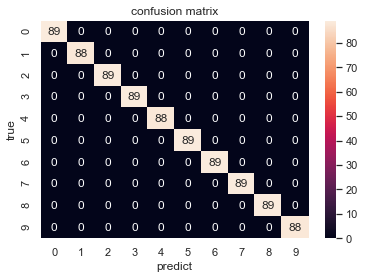

In [10]:
sns.set()
f,ax=plt.subplots()
y_true = y_test
y_pred = clf.predict(X_test)
C2= confusion_matrix(y_true, y_pred)
sns.heatmap(C2,annot=True,ax=ax, fmt='d') 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

### Robustness Check

Load 1730rpm files

In [11]:
List_of_matfiles_1730 = proc.get_filelist_from_48k_and_Normal_Data('1730')
X_FE_time_1730, y_FE_time_1730 = Compute_Multiple_FFT_in_Chunks(List_of_matfiles_1730, column='FE_time', rpm='1730')

Train with 1750rpm data and test with 1730rpm

In [12]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_FE_time_1750, y_FE_time_1750)
print(clf.score(X_FE_time_1730, y_FE_time_1730))

0.8816844919786097


In [13]:
print(classification_report(y_FE_time_1730, clf.predict(X_FE_time_1730)))

              precision    recall  f1-score   support

         1.0       0.60      1.00      0.75       300
         2.0       0.97      0.96      0.97       300
         3.0       1.00      0.57      0.72       298
         4.0       0.99      0.98      0.98       298
         5.0       1.00      1.00      1.00       300
         6.0       0.91      1.00      0.95       299
         7.0       0.97      0.88      0.92       300
         8.0       0.90      0.97      0.93       300
         9.0       0.87      0.46      0.60       299
        10.0       0.85      1.00      0.92       298

    accuracy                           0.88      2992
   macro avg       0.91      0.88      0.88      2992
weighted avg       0.91      0.88      0.88      2992



In [14]:
print(confusion_matrix(y_FE_time_1730, clf.predict(X_FE_time_1730)))

[[300   0   0   0   0   0   0   0   0   0]
 [  0 288   0   0   0   0   7   0   5   0]
 [110   0 169   0   0   0   0  19   0   0]
 [  0   0   0 292   0   0   0   0   0   6]
 [  0   0   0   0 300   0   0   0   0   0]
 [  0   0   0   0   0 299   0   0   0   0]
 [  0   8   0   4   0   0 264   8  16   0]
 [  0   0   0   0   0   9   1 290   0   0]
 [ 90   0   0   0   0  21   1   4 138  45]
 [  0   0   0   0   0   0   0   0   0 298]]


Text(30.5, 0.5, 'true')

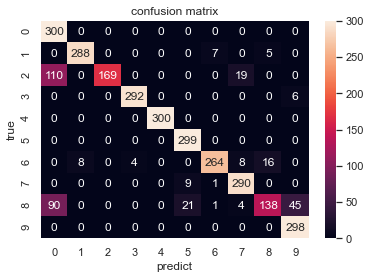

In [15]:
sns.set()
f,ax=plt.subplots()
y_true = y_FE_time_1730
y_pred = clf.predict(X_FE_time_1730)
C2= confusion_matrix(y_true, y_pred, )
sns.heatmap(C2,annot=True,ax=ax, fmt='d') 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 

Train with 1730rpm and test with 1750rpm

In [16]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_FE_time_1730, y_FE_time_1730)
print(clf.score(X_FE_time_1750, y_FE_time_1750))

0.6907983761840325


In [17]:
print(classification_report(y_FE_time_1750, clf.predict(X_FE_time_1750)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       295
         2.0       1.00      0.69      0.82       295
         3.0       1.00      1.00      1.00       295
         4.0       0.48      1.00      0.65       296
         5.0       0.62      1.00      0.77       295
         6.0       1.00      0.11      0.20       296
         7.0       0.83      0.97      0.90       298
         8.0       0.99      0.95      0.97       296
         9.0       0.58      0.19      0.29       296
        10.0       0.49      1.00      0.66       294

    accuracy                           0.69      2956
   macro avg       0.70      0.69      0.62      2956
weighted avg       0.70      0.69      0.62      2956



/Users/davidburkhart/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidburkhart/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/davidburkhart/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [18]:
print(confusion_matrix(y_FE_time_1750, clf.predict(X_FE_time_1750)))

[[  0   0   0 163 130   0   0   0   2   0]
 [  0 204   0   2   0   0  55   0  34   0]
 [  0   0 295   0   0   0   0   0   0   0]
 [  0   0   0 296   0   0   0   0   0   0]
 [  0   0   0   0 295   0   0   0   0   0]
 [  0   0   0  43   0  32   0   3   3 215]
 [  0   0   0   8   0   0 290   0   0   0]
 [  0   0   0   3   1   0   2 280   1   9]
 [  0   0   0 104  50   0   3   0  56  83]
 [  0   0   0   0   0   0   0   0   0 294]]


Text(30.5, 0.5, 'true')

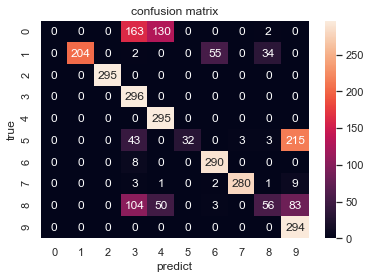

In [19]:
sns.set()
f,ax=plt.subplots()
y_true = y_FE_time_1750
y_pred = clf.predict(X_FE_time_1750)
C2= confusion_matrix(y_true, y_pred, )
sns.heatmap(C2,annot=True,ax=ax, fmt='d') 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 